In [1]:
import torch
from torch import Tensor, nn
from torch.types import Device, _size
from collections import OrderedDict

import os
import shutil
from pathlib import Path
import mne
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
%matplotlib notebook

num_train = 2717
num_eval = 276

In [ ]:
import os
os.cpu_count()

In [ ]:
labels = df = pd.read_csv('../data/seg_csv/train_12000/aaaaacby_s004_t000_1.csv')

### Read edf

In [9]:
file_path = '../data/edf/normal/aaaaacby_s004_t000.edf'
raw = mne.io.read_raw_edf(file_path)
raw.resample(100)    # resampling to xHz
sfreq = raw.info['sfreq']   # 100
#     logger.info(freq)
raw.crop(tmin=60)

Extracting EDF parameters from /home/yossi/Projects/EEG_transformer/data/edf/normal/aaaaacby_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | aaaaacby_s004_t000.edf, 36 x 114700 (1147.0 s), ~31.5 MB, data loaded>

In [ ]:
pd_frame = raw.to_data_frame(picks=['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF','EEG F4-REF', 
                                            'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 
                                            'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
                                            'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 
                                            'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'])

In [ ]:
raw.info

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


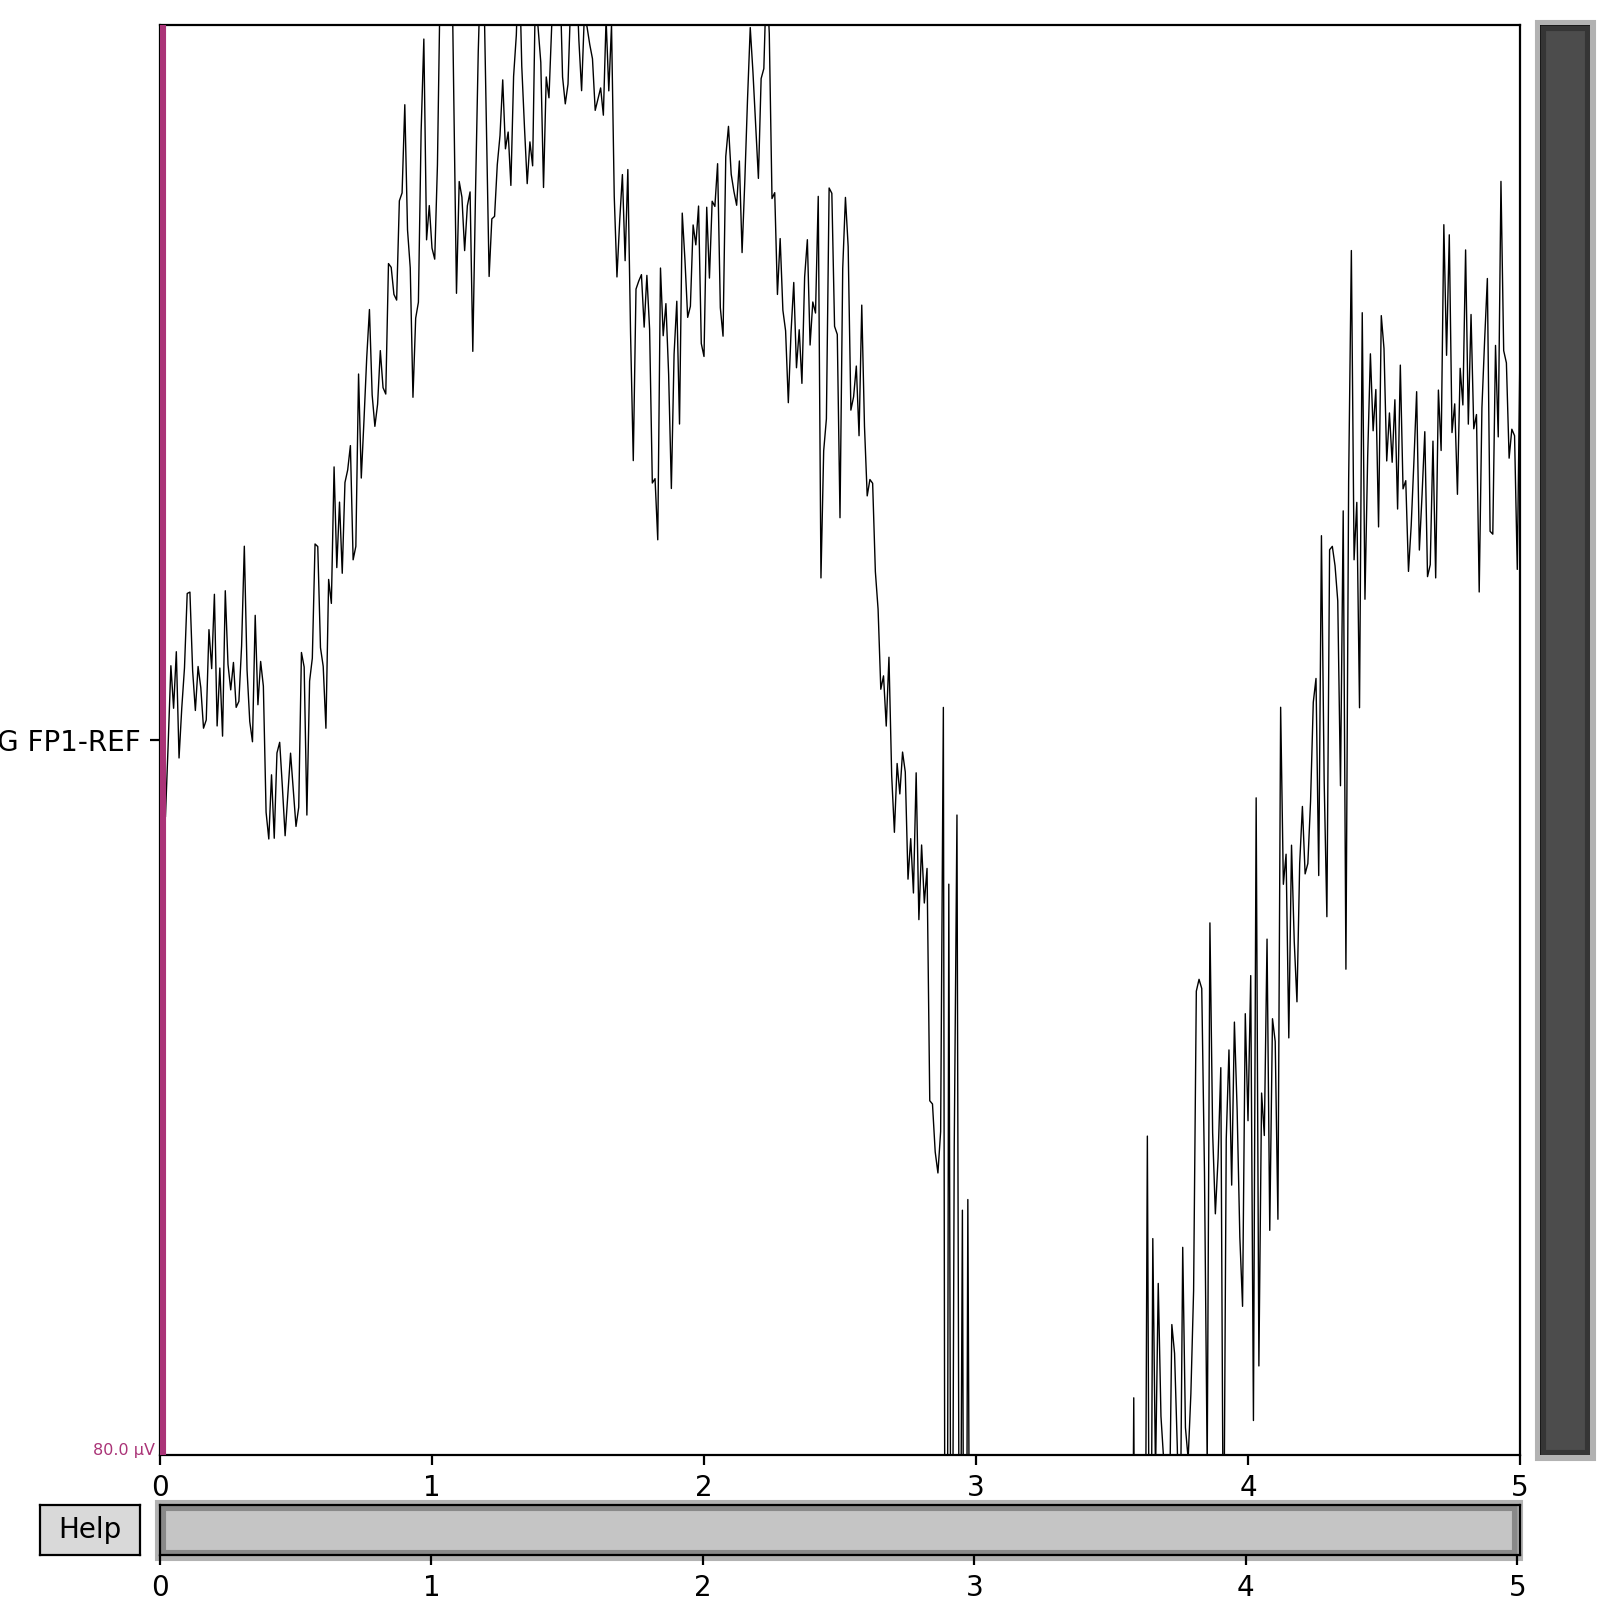

<IPython.core.display.Javascript object>


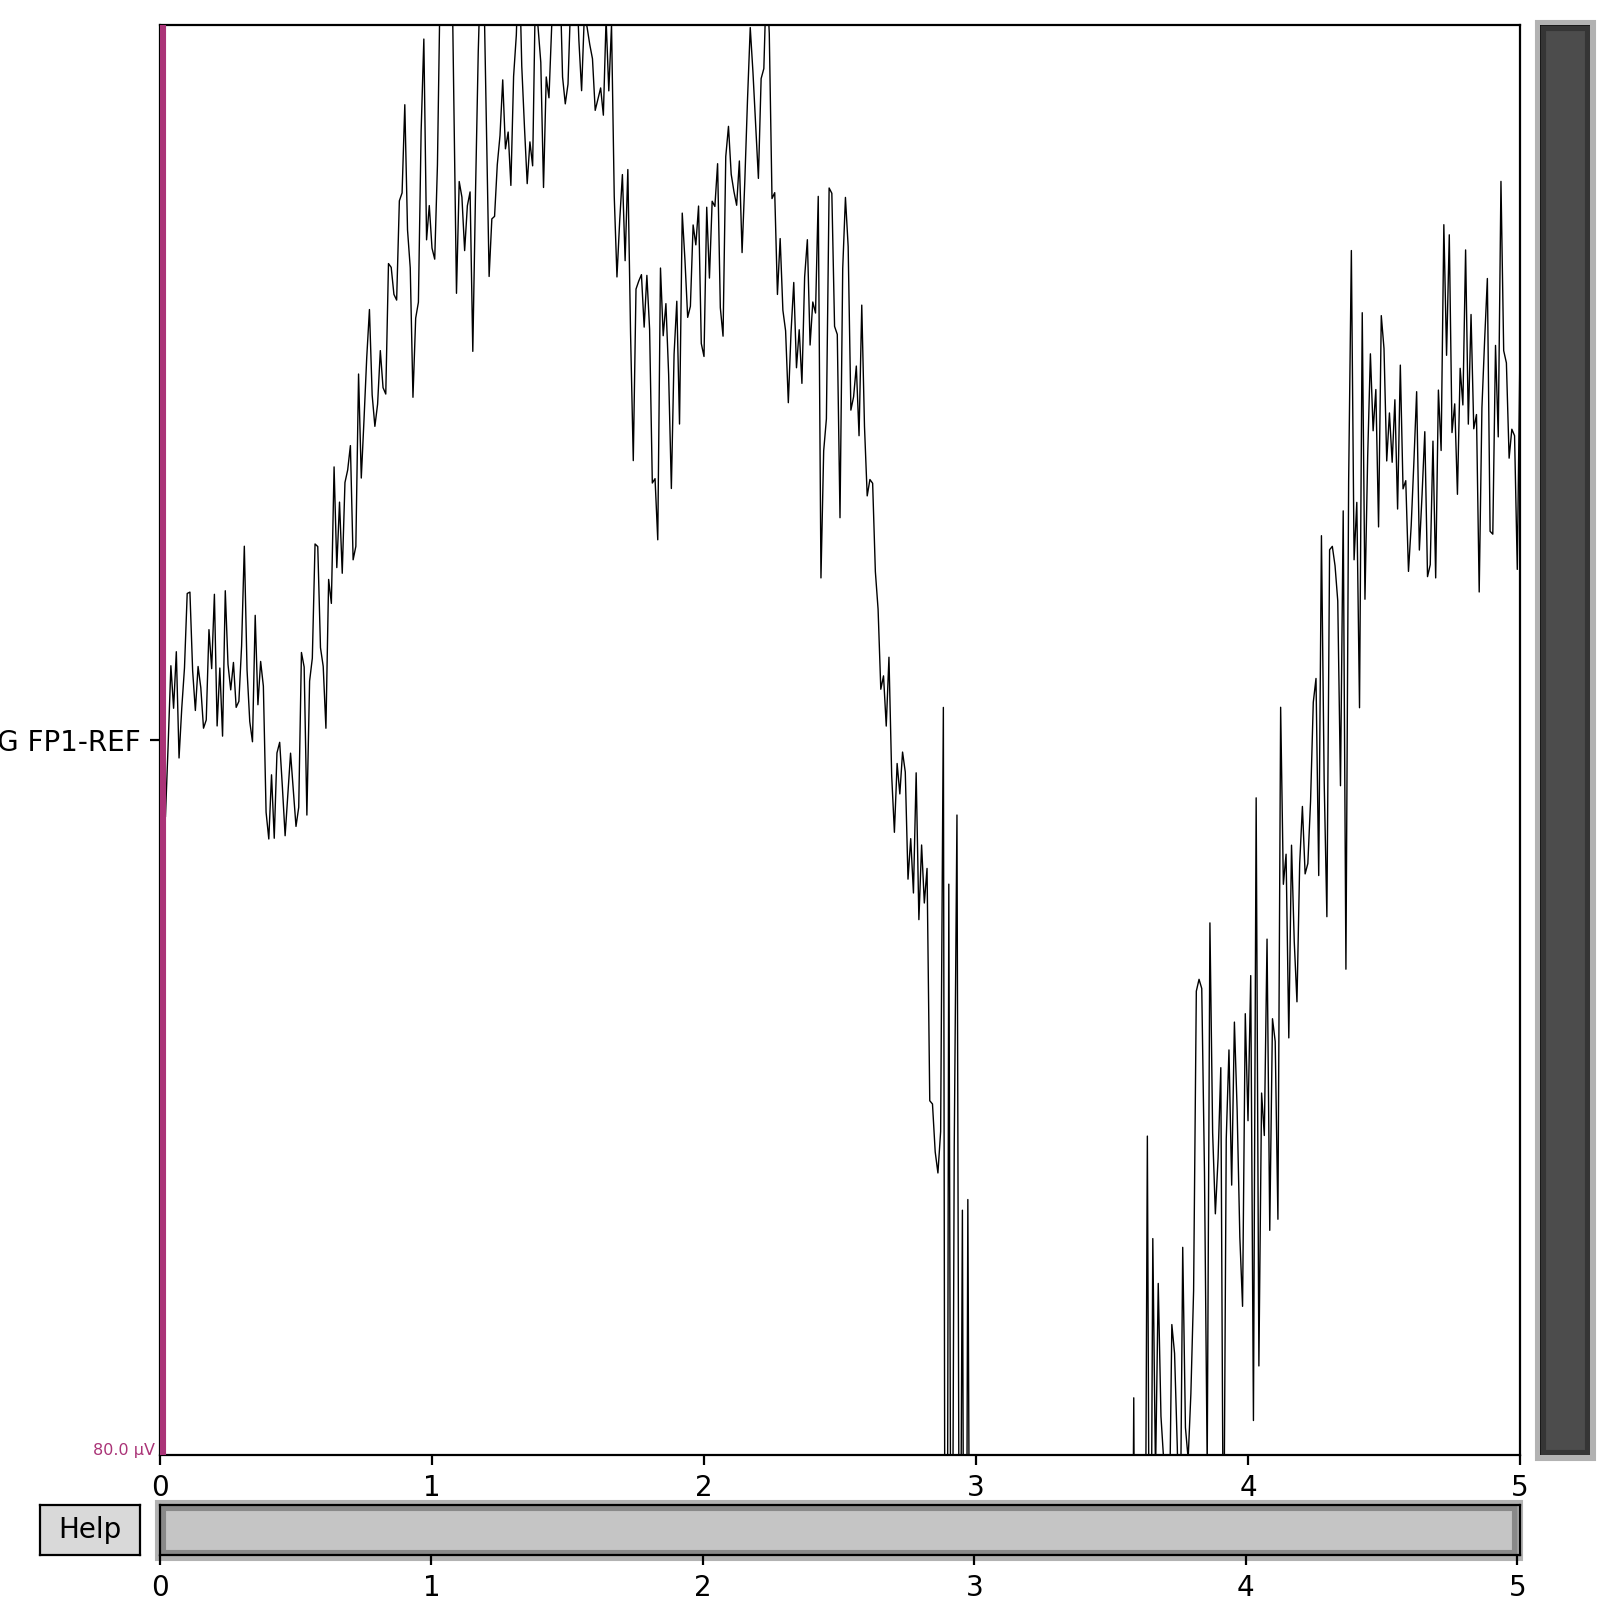

In [10]:
raw_cp = raw.copy().pick('EEG FP1-REF')
raw_cp.crop(tmin=10, tmax=15.0)
raw_cp.plot(scalings=dict(eeg=40e-6))

### Save to csv

In [ ]:
pd_frame.to_csv('../test.csv', index=False)

### Read csv

In [6]:
# df = pd.read_csv('../data/seg_csv/aaaaacby_s004_t000_13.csv')
df = pd.read_csv('../data/seg_csv/train_12000/aaaaacby_s004_t000_1.csv')

In [2]:
df = pd.read_csv('../data/seg_csv/train_12000/aaaaaakr_s004_t000_1.csv')


In [3]:
df.shape

(12000, 19)

<IPython.core.display.Javascript object>


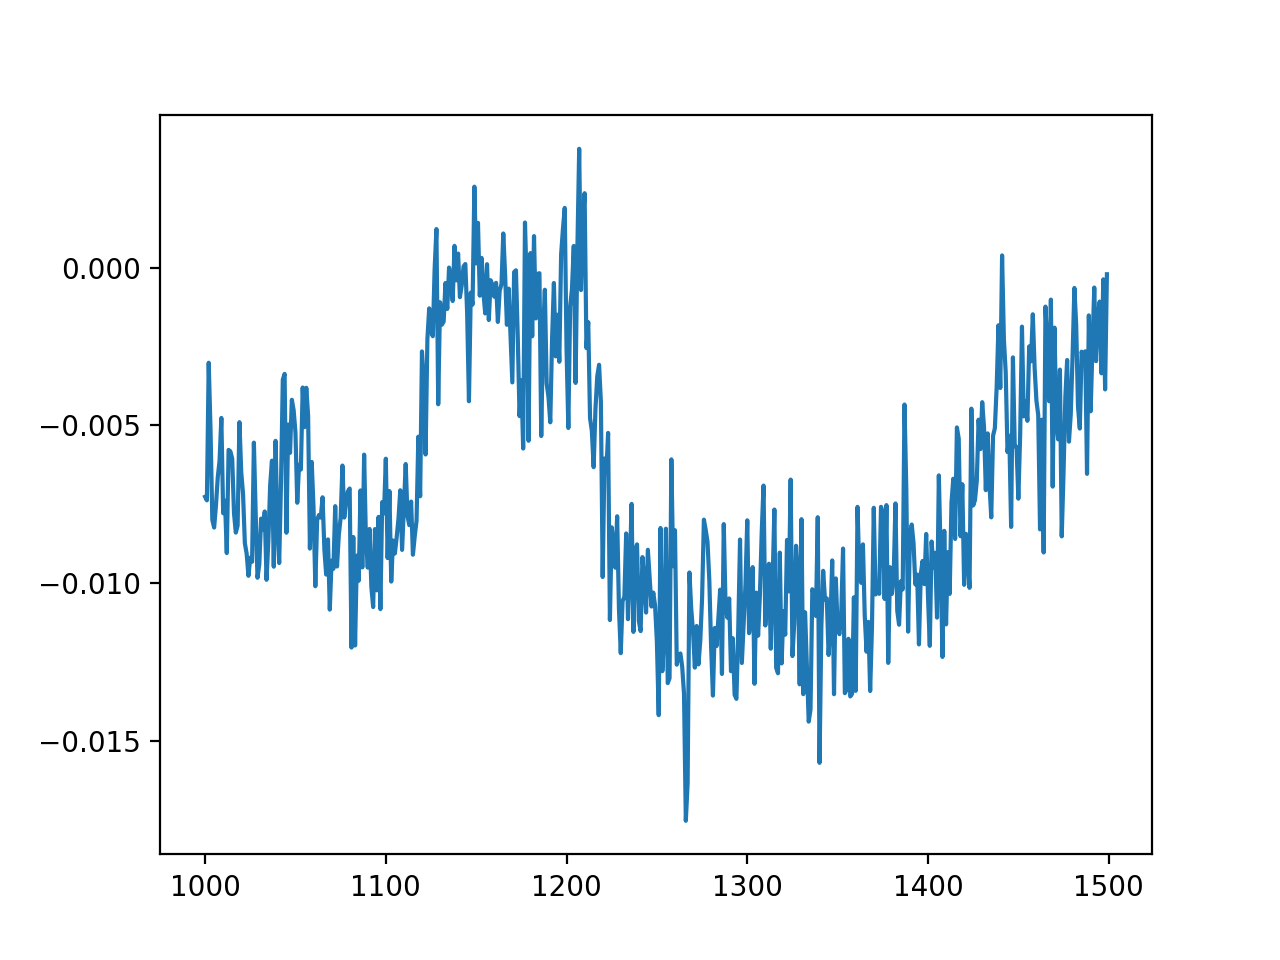

In [4]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()  # Adjust the grid size as needed
ax = ax.plot(df.iloc[1000:1500,1])
# ax.set_title(f'Channel {df.iloc[0,1]}')
# ax.set_xlabel('Sample Index')
# ax.set_ylabel('Signal Value')
plt.show()

In [ ]:
scaler = Normalizer()
segment = scaler.fit_transform(df.T)
segment = segment.T

In [ ]:
fig, ax = plt.subplots()  # Adjust the grid size as needed
ax = ax.plot(segment[:,0])
# ax.set_title(f'Channel {df.iloc[0,1]}')
# ax.set_xlabel('Sample Index')
# ax.set_ylabel('Signal Value')
plt.show()

In [ ]:
scaler_1 = StandardScaler()
segment_1 = scaler_1.fit_transform(df.T)
segment_1 = segment.T

fig, ax = plt.subplots()  # Adjust the grid size as needed
ax = ax.plot(segment[:,0])
# ax.set_title(f'Channel {df.iloc[0,1]}')
# ax.set_xlabel('Sample Index')
# ax.set_ylabel('Signal Value')
plt.show()

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))  # Adjust the grid size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each channel in a separate subplot
for i in range(19):
    ax = axes[i]
    ax.plot(df.iloc[:, i])
    ax.set_title(f'Channel {i+1}')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Signal Value')

# Remove the unused subplot (if the number of subplots is more than the channels)
for j in range(19, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
data_len = 6000
raw.resample(100)    # resampling to xHz
sfreq = raw.info['sfreq']   # 100
#     logger.info(freq)
raw.crop(tmin=60)    # start from 60 secs

In [ ]:
n_segments = int(np.floor(raw.times[-1] *sfreq/data_len))
pd_frame = raw.to_data_frame(picks=['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF','EEG F4-REF', 
                                            'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 
                                            'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
                                            'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 
                                            'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'])

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
seg_nor = scaler.fit_transform(segment)

### Data Processing

In [ ]:
import os
import shutil
from pathlib import Path
import mne
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [ ]:
edf_data_path = Path('./data/edf/train/')
edf_data_path.parts[-1]

In [ ]:
import logging

logger = logging.getLogger(__name__)  # Use the current module's name
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
# formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
# handler.setFormatter(formatter)
logger.addHandler(handler)
test_accuracy = 0.95  # Replace with your actual accuracy calculation
logger.info(f"test accuracy:{test_accuracy}")  # Log as info

In [ ]:
def positional_encoding(max_length:int, d_model:int, model_type='sinusoidal'):
    """
    Generates positional encodings for a given maximum sequence length and model dimensionality.

    Args:
        max_length (int): The maximum length of the sequence.
        d_model (int): The dimensionality of the model.
        model_type (str): The type of positional encoding to use. Defaults to 'sinusoidal'.

    Returns:
        numpy.ndarray: The positional encoding matrix of shape (max_length, d_model).
    """

    if model_type == 'sinusoidal':
        pe = np.zeros((max_length, d_model))
        position = np.arange(0, max_length, dtype=np.float32).reshape(-1, 1)
        div_term = np.exp(np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = np.sin(position * div_term)
        if pe.size % 2 != 0:
            pe[:, 1::2] = np.cos(position[:-1] * div_term)
    else:
        raise ValueError("Unsupported model_type: {}".format(model_type))

    return pe

# pe_train = positional_encoding(X_train.shape[0], X_train.shape[1])
# pe_test = positional_encoding(X_test.shape[0], X_test.shape[1])
# # Add positional encoding to the signal
# X_train =  X_train + pe_train # Add corresponding row of pe matrix
# X_test =  X_test + pe_test

In [4]:
def data_clip(data_path:Path, result_path:Path, data_len:int): # data_path = Path('./data/edf/train/'); 
                                                                # result_path = Path('./data/origin_csv/train/')
    if os.path.exists(result_dir_path):
        shutil.rmtree(result_dir_path)
    os.mkdir(result_dir_path)
    
    
    channels = ['Fp1', 'Fp2', 'F3','F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4',
                'T5', 'T6', 'Fz', 'Cz', 'Pz']
    label_path = data_path
    stage = str(data_path.parts[-1])
    label = pd.DataFrame(columns=['csv_file','label'])
#     pe = positional_encoding(data_len, len(channels))    # 1000 needs to adjust according my study
    
    
    for file_path in data_path.glob('**/*.edf'):
        sub_label = str(file_path.parts[3])
        file_name = str(file_path.name).split('.')[0]
    #     print(sub_label, file_path, file_name)
        raw = mne.io.read_raw_edf(file_path)
        raw.resample(100)    # resampling to xHz
        sfreq = raw.info['sfreq']   # 100
    #     logger.info(freq)
        raw.crop(tmin=60)    # start from 60 secs
#         n_segments = int(np.floor(raw.times[-1] *sfreq/data_len))
        start, end = 0, data_len   # initilize slide window
        count = 0  # initilize num.of segments
        
        pd_frame = raw.to_data_frame(picks=['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF','EEG F4-REF', 
                                            'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 
                                            'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
                                            'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 
                                            'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'])
    #     channels = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF','EEG F4-REF', 
    #                                         'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 
    #                                         'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
    #                                         'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 
    #                                         'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']    
#         print(pd_frame.shape)
    #     logger.debug(pe)  # Log as info
        while end <= pd_frame.shape[0]:
#         for i in range(n_segments):
#             start_time = i * data_len  # Start time of the segment in seconds
#             end_time = start_time + data_len  # End time of the segment in seconds

            # Extract the segment
            segment = pd_frame.iloc[start:end, 1:]
    #         logger.info(segment.shape, file_name)

            scaler = Normalizer()
            segment = scaler.fit_transform(segment.T).T
#             segment = segment.T + pe
            np.savetxt(f'{str(result_dir_path)}/{file_name}_{count+1}.csv', segment, header=','.join(channels), 
                       delimiter=',')
#             segment.to_csv(f'{str(result_dir_path)}/{file_name}_{count+1}.csv', index=False)

            label.loc[len(label)] = [f'{file_name}_{count+1}.csv', sub_label]
            start += data_len
            end += data_len
            count += 1
        
        raw.close()
    label.to_csv(f'../data/{stage}_label_{segment_length}.csv', index=False)
    

### Process training dataset

In [5]:
# training dataset
# edf_data_path = Path('../../Dataset/tuh_eeg_abnormal/v3.0.1/edf/train/')  # need to modify
edf_data_path = Path('../data/edf/')
result_dir_path = Path('../data/seg_csv/train_12000')
segment_length = 12000
data_clip(edf_data_path, result_dir_path, segment_length)

# edf_data_path = Path('../../Dataset/tuh_eeg_abnormal/v3.0.1/edf/eval/')  # need to modify
# result_dir_path = Path('./data/seg_csv/eval_12000/')
# data_clip(edf_data_path, result_dir_path, segment_length)

Extracting EDF parameters from /home/yossi/Projects/EEG_transformer/data/edf/abnormal/aaaaagvx_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/yossi/Projects/EEG_transformer/data/edf/abnormal/aaaaaddm_s006_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/yossi/Projects/EEG_transformer/data/edf/normal/aaaaacby_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/yossi/Projects/EEG_transformer/data/edf/normal/aaaaahzi_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
scaler = Normalizer()
segment = scaler.fit_transform(segment.T)
#             segment = segment + pe
#         if segment.shape[0]>1000
segment = pd.DataFrame(segment.T, columns=channels)

#         data, times = raw[:, start_time*freq:end_time*freq]
#     print(times)
#         df = raw.to_data_frame()
segment.to_csv(f'{str(result_dir_path)}/{file_name}_{i+1}.csv', index=False)
#         np.savetxt(f'./data/origin_csv/train/{file_name}_{i+1}.csv', segment, header=','.join(channels), 
#                    delimiter=',')
label.loc[len(label)] = [f'{file_name}_{i+1}.csv', sub_label]

#### Dataset